# Libraries

In [21]:
import numpy as np
from scipy.stats import gmean
from scipy.stats import hmean
from scipy.stats import trim_mean

# Média

## Média Aritmética

In [3]:
#A soma de todos os valores dividida pelo número de valores. Representa o valor cetral

In [12]:
# Exemplo:
dadosmedia = [12,45,90,45,67,43]
media = np.mean(dadosmedia)
print("O valor dá média é:", media)

O valor dá média é: 50.333333333333336


## Média Ponderada

In [4]:
# A soma de todos os valores, multiplicada por um peso e dividida pela soma dos pesos

In [13]:

# Lista de números
valores = [3, 7, 5]

# Lista de pesos correspondentes
pesos = [2, 3, 1]

# Calculando a média ponderada
media_ponderada = np.average(valores, weights=pesos)

print(f'A média ponderada dos números é: {media_ponderada}')


A média ponderada dos números é: 5.333333333333333


# Média Geométrica

In [14]:
#A média geométrica é uma medida de tendência central que é útil para conjuntos de números que são produtos de muitos termos, como taxas de crescimento. 
# Ela é calculada multiplicando todos os valores do conjunto de dados e, em seguida, tirando a raiz enésima desse produto, onde n é o número de valores
#Ex: Crescimento populacional, retornos de investimento, ou crescimento de vendas, a média geométrica dará uma representação mais precisa do crescimento médio ao longo do tempo.


In [18]:

# Lista de números
numeros = [10, 200, 3000, 40000, 500000000]

# Calculando a média geométrica
media_geometrica = gmean(numeros)

print(f'A média geométrica dos números é: {media_geometrica}')


A média geométrica dos números é: 10371.372893366499


# Média Harmônica

In [ ]:
#É o inverso da média aritmética dos inversos dos valores, frequentemente usada em contextos de taxas ou proporções.

In [20]:
# Lista de números
numeros = [1, 2, 3, 4, 5]

# Calculando a média harmônica
media_harmonica = hmean(numeros)

print(f'A média harmônica dos números é: {media_harmonica}')


A média harmônica dos números é: 2.18978102189781


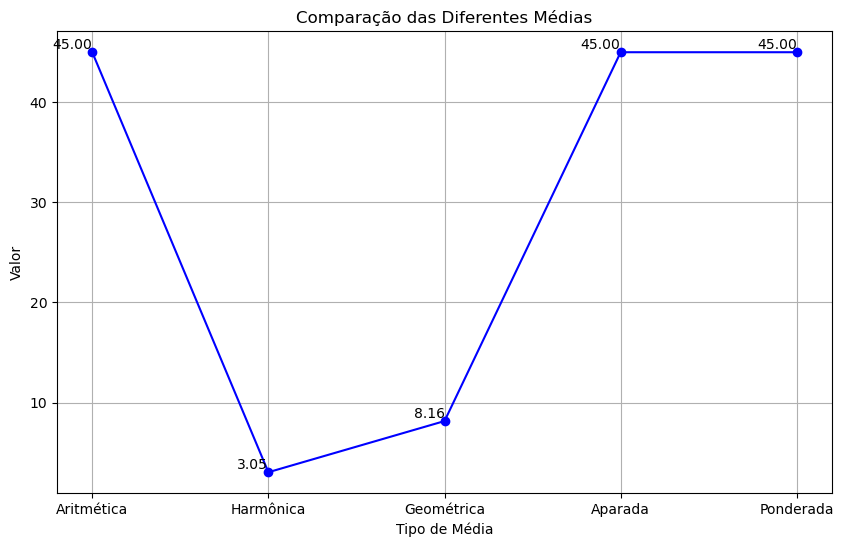

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hmean, gmean, trim_mean

# Dados
numeros = [1, 2, 3, 4, 5, 100, 200]
pesos = [1, 1, 1, 1, 1, 1, 1]  # Pesos iguais para simplicidade
proporcao_corte = 0.1

# Calculando as médias
media_aritmetica = np.mean(numeros)
media_harmonica = hmean(numeros)
media_geometrica = gmean(numeros)
media_aparada = trim_mean(numeros, proporcao_corte)
media_ponderada = np.average(numeros, weights=pesos)

# Preparando os dados para o gráfico
medias = [
    media_aritmetica,
    media_harmonica,
    media_geometrica,
    media_aparada,
    media_ponderada
]

nomes_medias = [
    'Aritmética',
    'Harmônica',
    'Geométrica',
    'Aparada',
    'Ponderada'
]

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(nomes_medias, medias, marker='o', linestyle='-', color='b')

# Adicionando rótulos aos pontos
for i, media in enumerate(medias):
    plt.text(nomes_medias[i], media, f'{media:.2f}', ha='right', va='bottom')

plt.xlabel('Tipo de Média')
plt.ylabel('Valor')
plt.title('Comparação das Diferentes Médias')
plt.grid(True)
plt.show()


# Média aparada

In [23]:
#A média aparada (ou truncada) é uma média calculada após remover uma certa proporção dos menores e maiores valores do conjunto de dados. 
# Isso ajuda a reduzir o impacto de outliers nos dados.

In [22]:
# Lista de números
numeros = [1, 2, 3, 4, 5, 100, 200]

# Proporção de corte (por exemplo, 10% em cada extremidade)
proporcao_corte = 0.1

# Calculando a média aparada
media_aparada = trim_mean(numeros, proporcao_corte)

print(f'A média aparada dos números é: {media_aparada}')


A média aparada dos números é: 45.0


# Mediana

In [8]:
# O valor que ocupa a posição dos dados

In [32]:
# Lista de números
numeros = [1, 3, 3, 6, 7, 8, 9]

# Calculando a mediana
mediana = np.median(numeros)

print(f'A mediana dos números é: {mediana}')


A mediana dos números é: 6.0


## Mediana ponderada

In [6]:
#Valor cuja posição está no centro da soma dos pesos, estando metade da soma antes e metade depois desse dado

In [33]:
def mediana_ponderada(valores, pesos):
    # Verifica se o comprimento de valores e pesos são iguais
    if len(valores) != len(pesos):
        raise ValueError("O comprimento dos valores e pesos deve ser igual.")

    # Ordena os valores e pesos com base nos valores
    valores_pesos = sorted(zip(valores, pesos))
    valores_ordenados, pesos_ordenados = zip(*valores_pesos)
    
    # Calcula o peso cumulativo
    peso_total = sum(pesos_ordenados)
    peso_cumulativo = np.cumsum(pesos_ordenados)
    
    # Encontra o índice da mediana ponderada
    mediana_idx = np.searchsorted(peso_cumulativo, peso_total / 2)
    
    return valores_ordenados[mediana_idx]

# Lista de valores e seus pesos
valores = [1, 3, 5, 7, 9]
pesos = [1, 2, 3, 4, 5]

# Calculando a mediana ponderada
mediana_ponderada_valor = mediana_ponderada(valores, pesos)

print(f'A mediana ponderada dos valores é: {mediana_ponderada_valor}')


A mediana ponderada dos valores é: 7


# Mediana aparada

In [34]:
import numpy as np
from scipy.stats import trim_mean

# Lista de números
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Proporção de corte (por exemplo, 20% em cada extremidade)
proporcao_corte = 0.2

# Calculando a mediana aparada
def mediana_aparada(dados, proporcao_corte):
    # Ordena os dados
    dados_ordenados = sorted(dados)
    
    # Calcula o número de valores a serem removidos
    n = len(dados_ordenados)
    num_remover = int(n * proporcao_corte)
    
    # Remove os valores da extremidade
    dados_aparados = dados_ordenados[num_remover:n - num_remover]
    
    # Calcula a mediana dos valores restantes
    if len(dados_aparados) % 2 == 0:
        mediana = (dados_aparados[len(dados_aparados) // 2 - 1] + dados_aparados[len(dados_aparados) // 2]) / 2
    else:
        mediana = dados_aparados[len(dados_aparados) // 2]
    
    return mediana

# Calculando a mediana aparada
mediana_aparada_valor = mediana_aparada(numeros, proporcao_corte)

print(f'A mediana aparada dos números é: {mediana_aparada_valor}')


A mediana aparada dos números é: 5.5


# Robusto

In [7]:
# Não sensível a valores extremos

# Outlier

In [ ]:
# Um valor de dados que é muito diferente da maioria dos dados.